X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_train dtype: uint8
y_train dtype: uint8
label0: 6
pixel min: 0 pixel max: 255


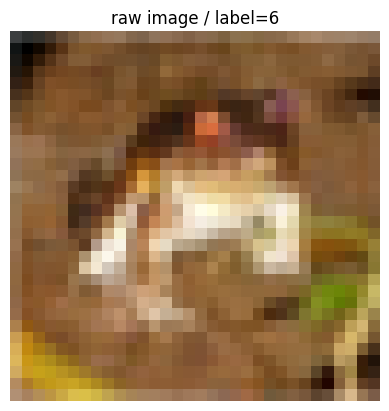

In [3]:
# ===== 0. ライブラリ読み込み =====
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ===== 1. CIFAR-10 データセットを読み込む（前処理前） =====
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# ===== 2. データの形を確認 =====
print("X_train shape:", X_train.shape)   # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)   # (50000, 1)
print("X_train dtype:", X_train.dtype)   # uint8
print("y_train dtype:", y_train.dtype)

# ===== 3. 最初の画像とラベルを取り出す =====
img0 = X_train[0]          # 最初の画像（前処理なし）
label0 = y_train[0][0]     # 最初のラベル（0〜9）

print("label0:", label0)
print("pixel min:", img0.min(), "pixel max:", img0.max())

# ===== 4. 画像を表示 =====
plt.imshow(img0)
plt.title(f"raw image / label={label0}")
plt.axis("off")
plt.show()


train: (10000, 32, 32, 3) (10000,)
test : (2000, 32, 32, 3) (2000,)


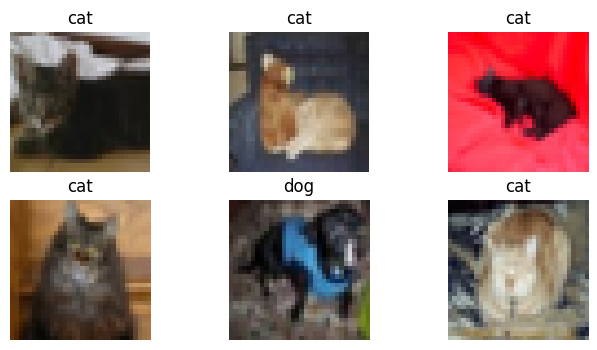

In [4]:


# CIFAR-10 読み込み
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(-1)
y_test  = y_test.reshape(-1)

# cat=3, dog=5 を抽出
train_mask = (y_train == 3) | (y_train == 5)
test_mask  = (y_test == 3) | (y_test == 5)

X_train2 = X_train[train_mask]
y_train2 = y_train[train_mask]
X_test2  = X_test[test_mask]
y_test2  = y_test[test_mask]

# 0/1化（cat=0, dog=1）
y_train2 = (y_train2 == 5).astype(np.int32)
y_test2  = (y_test2 == 5).astype(np.int32)

# 正規化
X_train2 = X_train2.astype("float32") / 255.0
X_test2  = X_test2.astype("float32") / 255.0

print("train:", X_train2.shape, y_train2.shape)
print("test :", X_test2.shape, y_test2.shape)

# 画像を少し見る
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train2[i])
    plt.title("dog" if y_train2[i]==1 else "cat")
    plt.axis("off")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X_train3, X_valid3, y_train3, y_valid3 = train_test_split(
    X_train2,
    y_train2,
    test_size=0.3,      # 3割を検証用
    random_state=0
)

print("X_train3:", X_train3.shape)
print("y_train3:", y_train3.shape)
print("X_valid3:", X_valid3.shape)
print("y_valid3:", y_valid3.shape)


X_train3: (7000, 32, 32, 3)
y_train3: (7000,)
X_valid3: (3000, 32, 32, 3)
y_valid3: (3000,)


In [6]:
import tensorflow as tf

model = tf.keras.Sequential([
    # 入力（CIFAR-10は 32x32x3）
    tf.keras.layers.Input(shape=(32, 32, 3)),

    # 畳み込み + プーリング
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 1次元にして全結合へ
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),

    # 出力（二値分類）
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [7]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,977 (652.25 KB)

 Trainable params: 166,977 (652.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train3, y_train3,          # 学習データ
    epochs=20,                   # 学習回数
    batch_size=64,               # まとめて処理する枚数
    validation_data=(X_valid3, y_valid3),  # 検証データ
    verbose=1                    # 学習の進み具合を表示
)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5853 - loss: 0.6672 - val_accuracy: 0.6230 - val_loss: 0.6484
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6683 - loss: 0.6112 - val_accuracy: 0.6590 - val_loss: 0.6120
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7000 - loss: 0.5729 - val_accuracy: 0.6777 - val_loss: 0.5902
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7231 - loss: 0.5441 - val_accuracy: 0.6960 - val_loss: 0.5650
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7411 - loss: 0.5226 - val_accuracy: 0.6963 - val_loss: 0.5609
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7609 - loss: 0.4918 - val_accuracy: 0.7143 - val_loss: 0.5510
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7664 - loss: 0.4779 - val_accuracy: 0.7000 - val_loss: 0.5825
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7831 - loss: 0.4533 - val_accu

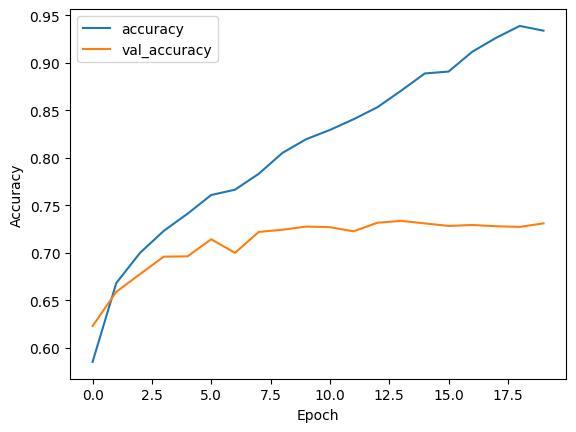

In [10]:
import matplotlib.pyplot as plt

# accuracy の推移
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
test_loss, test_accuracy = model.evaluate(X_test2, y_test2, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7480 - loss: 0.7081
Test loss: 0.7081364989280701
Test accuracy: 0.7480000257492065
